Link to Colab: https://drive.google.com/file/d/1XnjDfbFPOor-2yYptY-JL8GRYMtJAlaG/view?usp=sharing



#**Project title:  Predicting Heart Disease using Machine Learning Algorithm**
##Team14: Atharva Lokhande, Kevin Murphy, Riris Karolina, Shravani Thalla

## Table of Contents
1.   Introduction
2.   Data Dictionary and EDA
3.   Prepare Data Processing for Machine Learning
4.   Making the Base Model
5.   Feature Selection
6.   Create the Machine Learning Model
7.   Cost Evaluation of Each Model
8.   Conclusion
9.   References

## **Introduction**

In this section, we introduce our project, "Predicting Heart Disease using Machine Learning Algorithm", focusing on the crucial role of early detection in combating heart disease. The introduction sets the stage for the project by underscoring the importance of accurate prediction in healthcare and outlining the approach we plan to take. We briefly mention the types of data and machine learning methods we intend to use, providing a glimpse into the project's scope and potential impact. This project works as machine learning for classification, where 'HadHeartAttack' as 'Yes' or 'No' is the target variable.

We utilize a publicly available dataset from Kaggle specifically tailored for heart disease prediction. The dataset is from a 2022 CDC annual survey regarding heart health nationwide. The dataset selected for this project includes a collection of attributes that are considered relevant for predicting the presence of heart disease in individuals. Data link: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease


### Background

The background section delves into a detailed discussion of heart disease, including its epidemiology, causes, symptoms, and the global burden it poses on health systems. We then shift focus to the current diagnostic methods for heart disease, pinpointing their limitations and the need for more efficient, data-driven approaches. This part also explores how data analysis and machine learning are emerging as game-changers in healthcare, setting the stage for our project's relevance.

### Challenges
Here, we confront the challenges inherent in our project, starting with the intricacies of collecting high-quality, representative data. The discussion extends to the complexities of model selection, addressing the potential biases that could skew our predictions. We also emphasize the importance of creating interpretable models and discuss the ethical considerations that are paramount in medical applications of machine learning, acknowledging the delicate balance between technological advancement and ethical responsibility.

### Machine Learning in Action
This section is the crutial of our project, where we detail the processes of data preparation, including cleaning, normalization, and transformation. We then explore various machine learning models like K-Nearest Neighbors, Logistic Regression, Decision Trees, and Random Forests, discussing why each might be suitable for this specific task. The training and evaluation of these models are outlined, highlighting the use of recall as a critical metric due to the high cost of false negatives in predicting heart disease. We also touch on the importance of understanding feature significance in our models to glean deeper insights into the factors influencing heart disease.

### Outcome
In the final section, we present the outcomes of our machine learning models, showcasing their performance in predicting heart disease. We share insights and key findings from our models, especially regarding the most significant predictors of heart disease. The implications of these findings for healthcare professionals and patient care are discussed, emphasizing how our model could potentially enhance early detection and treatment strategies. We conclude by suggesting future research directions, considering improvements in model accuracy, data collection methods, and addressing any limitations encountered during the project.

## **Data Dictionary and EDA**




The dataset contains attributes about the Demographic Information, Health and Lifestyle Factors, Physical Metrics, Smoking and E-cigarette Usage, and Health Status and Disease. Here is a brief description of the columns.

| Column title            | Description                                                  |
| :---------------------- | :----------------------------------------------------------- |
| `State`                 | The U.S. state where the individual resides.                 |
| `Sex`                   | Gender of the individual, either Male or Female.             |
| `GeneralHealth`         | Self-reported general health status, ranging from Poor to Excellent. |
| `PhysicalHealthDays`    | Number of days with poor physical health in the past month.  |
| `MentalHealthDays`      | Number of days with poor mental health in the past month.    |
| `LastCheckupTime`       | Time since the last health checkup, ranging from less than a year to more than 5 years. |
| `PhysicalActivities`    | Indicates whether the individual engages in physical activities, Yes or No. |
| `SleepHours`            | Average number of hours of sleep per night.                  |
| `RemovedTeeth`          | Information on teeth removal, ranging from None to All.      |
| `HadHeartAttack`        | Indicates whether the individual had a heart attack, Yes or No. |
| `HadStroke`             | Indicates whether the individual had a stroke, Yes or No.    |
| `HadDiabetes`           | Indicates whether the individual has diabetes, including various conditions like pre-diabetes. |
| `BMI`                   | Body Mass Index of the individual.                           |
| `SmokerStatus`          | Smoking status of the individual, ranging from Never smoked to Current smoker. |
| `AlcoholDrinkers`       | Indicates whether the individual consumes alcohol, Yes or No. |
| `HIVTesting`            | Indicates whether the individual has been tested for HIV, Yes or No. |
| `FluVaxLast12`          | Indicates if the individual received a flu vaccine in the last 12 months, Yes or No. |
| `PneumoVaxEver`         | Indicates if the individual ever received a pneumonia vaccine, Yes or No. |
| `TetanusLast10Tdap`     | Information on receiving a tetanus/Tdap vaccine in the last 10 years. |
| `HighRiskLastYear`      | Indicates engagement in high-risk health behavior in the last year, Yes or No. |
| `CovidPos`              | COVID-19 positivity status of the individual.                 |


###EDA and Data Cleaning

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv('https://raw.githubusercontent.com/kevin-r-murphy/BA780_Project/main/heart_2022_no_nans.csv')
df.drop(['State', 'RemovedTeeth'], axis=1, inplace=True)
df['HadHeartAttack'].replace(['No', 'Yes'], [0.0,1.0], inplace = True)
#df =df.sample(frac=0.1, random_state=1) # Toggle sample of data for run time
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,0.0,No,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,0.0,No,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,0.0,No,No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,0.0,No,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,0.0,No,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [ ]:
df.info()# What type of data are stored in the columns
display(df.head(3))# Top 3 rows
df.describe()# Summary statistics of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 38 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Sex                        246022 non-null  object 
 1   GeneralHealth              246022 non-null  object 
 2   PhysicalHealthDays         246022 non-null  float64
 3   MentalHealthDays           246022 non-null  float64
 4   LastCheckupTime            246022 non-null  object 
 5   PhysicalActivities         246022 non-null  object 
 6   SleepHours                 246022 non-null  float64
 7   HadHeartAttack             246022 non-null  float64
 8   HadAngina                  246022 non-null  object 
 9   HadStroke                  246022 non-null  object 
 10  HadAsthma                  246022 non-null  object 
 11  HadSkinCancer              246022 non-null  object 
 12  HadCOPD                    246022 non-null  object 
 13  HadDepressiveDisorder      24

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,0.0,No,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,0.0,No,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,0.0,No,No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes


,PhysicalHealthDays,MentalHealthDays,SleepHours,HadHeartAttack,HeightInMeters,WeightInKilograms,BMI
count,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,4.119026,4.167140,7.021331,0.054609,1.705150,83.615179,28.668136
std,8.405844,8.102687,1.440681,0.227216,0.106654,21.323156,6.513973
min,0.000000,0.000000,1.000000,0.000000,0.910000,28.120000,12.020000
25%,0.000000,0.000000,6.000000,0.000000,1.630000,68.040000,24.270000
50%,0.000000,0.000000,7.000000,0.000000,1.700000,81.650000,27.460000
75%,3.000000,4.000000,8.000000,0.000000,1.780000,95.250000,31.890000
max,30.000000,30.000000,24.000000,1.000000,2.410000,292.570000,97.650000


###Visualization

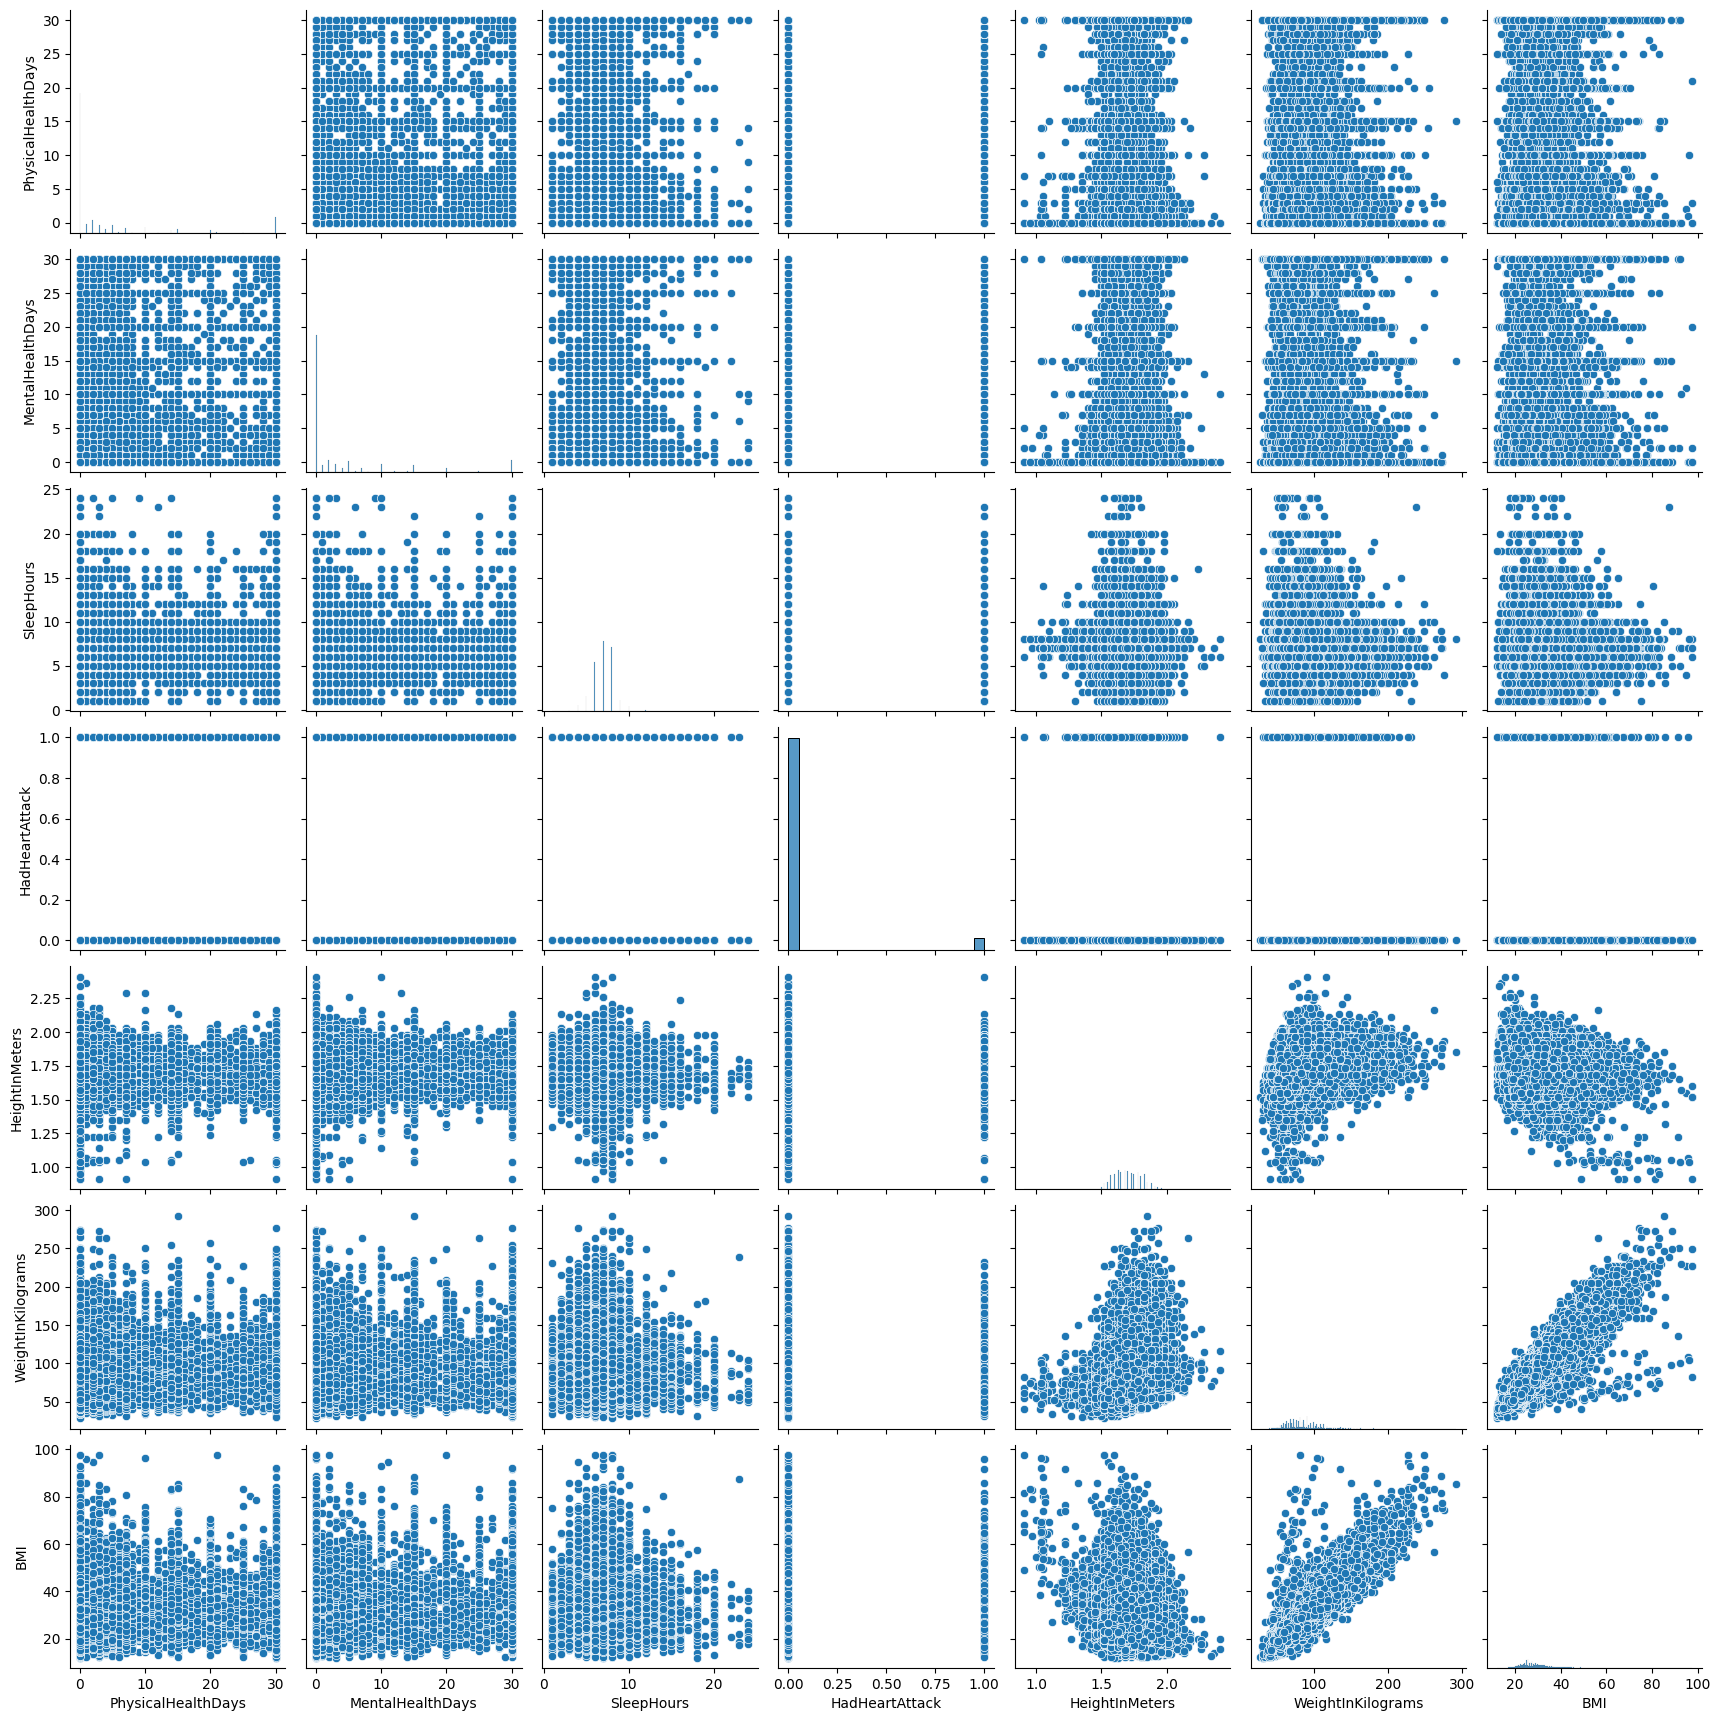

In [ ]:
#Visualizing correlation through pairplots
sns.pairplot(df)

##**Prepare Data Processing for Machine Learning**

###Create a Test Train Split Set

In [ ]:
# Importing necessary libraries from scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Split the data into training and testing sets

X = df.drop('HadHeartAttack', axis = 1)
y = df['HadHeartAttack'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

###Construct the Pipeline

In [ ]:
# Pre-process the categorical and numeric columns separately

cat_pipe = make_pipeline(SimpleImputer(strategy = 'most_frequent'),
    OneHotEncoder(handle_unknown = 'ignore', drop = 'first'))

num_pipe = make_pipeline(SimpleImputer(strategy = 'median'),
    StandardScaler())

preprocess = ColumnTransformer([('num', num_pipe, make_column_selector(dtype_include=np.number)),
   ('cat', cat_pipe, make_column_selector(dtype_include=np.object))])

preprocess


<ipython-input-5-cb9606869b1e>:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ('cat', cat_pipe, make_column_selector(dtype_include=np.object))])


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7922c19e30a0>),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7922c19e33a0>)])

In [ ]:
#Checking shapes before and after preprocess

print(X_train.shape)

X_train_prepared = preprocess.fit_transform(X_train).toarray()
print(X_train_prepared.shape)

(196817, 37)
(196817, 65)


In [ ]:
#Print prepared columns
X_train_prepared_df = pd.DataFrame(X_train_prepared,
                                   columns=preprocess.get_feature_names_out(),
                                   index=X_train.index)
X_train_prepared_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196817 entries, 148134 to 128037
Data columns (total 65 columns):
 #   Column                                                                        Non-Null Count   Dtype  
---  ------                                                                        --------------   -----  
 0   num__PhysicalHealthDays                                                       196817 non-null  float64
 1   num__MentalHealthDays                                                         196817 non-null  float64
 2   num__SleepHours                                                               196817 non-null  float64
 3   num__HeightInMeters                                                           196817 non-null  float64
 4   num__WeightInKilograms                                                        196817 non-null  float64
 5   num__BMI                                                                      196817 non-null  float64
 6   cat__Sex_Male  

###Create Confustion Matrix Visualization to compare models

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

def print_scores(y_test, y_pred):
  plt.rc("font", size=20)
  cmd = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues, colorbar=False)
  accuracy = accuracy_score(y_test, y_pred)
  balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
  print(f'Accuracy={accuracy:.4f}, Balanced Accuracy={balanced_accuracy:.4f}')


  precision = precision_score(y_test, y_pred, pos_label=1.0)
  recall = recall_score(y_test, y_pred, pos_label = 1.0)
  f1 = f1_score(y_test, y_pred, pos_label= 1.0)
  print(f'Precision={precision:.4f}, Recall={recall:.4f}, F1-score={f1:.4f}')

##**Making the Base Model**

Accuracy=0.9454, Balanced Accuracy=0.5000
Precision=0.0000, Recall=0.0000, F1-score=0.0000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Base Model Confusion Matrix')

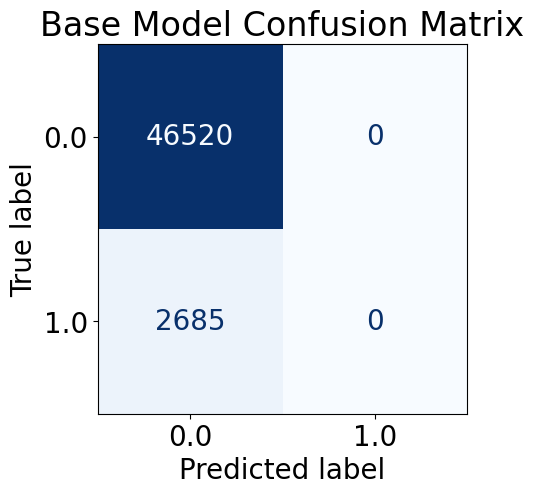

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score

numeric = X.select_dtypes(include=np.number).columns

X_train_prepared = preprocess.fit_transform(X_train).toarray()
X_test_prepared = preprocess.transform(X_test)
X_train_base = preprocess.fit_transform(X_train[numeric])
X_test_base = preprocess.transform(X_test[numeric])

base_model = LogisticRegression()
base_model.fit(X_train_base, y_train)
base_model.score(X_test_base, y_test)
y_pred = base_model.predict(X_test_base)


print_scores(y_test, y_pred)
plt.title('Base Model Confusion Matrix')

##**Feature Selection**

###Select K Best (Omitted for time purposes)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.linear_model import LogisticRegression
#kbest = SelectKBest()
#k_best_pipe = make_pipeline([
#    ('prep', preprocess),
#    ('select', kbest),
#    ('model', LogisticRegression())
#])
#param_grid = {
#    'select__k': range(1, X_train.shape[1] + 1)
#}
#k_best_pipe

In [ ]:
#grid_search = GridSearchCV(k_best_pipe, param_grid, cv=5, scoring='balanced_accuracy')
#grid_search.fit(X_train, y_train)

In [ ]:
#cv_res = pd.DataFrame(grid_search.cv_results_)
#cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
#display(cv_res.filter(regex = '(^param_|mean_test_score)', axis=1))

#best_model = grid_search.best_estimator_
#selected_features = best_model["prep"].get_feature_names_out()[best_model["select"].get_support()]
#print(f'The selected features are {best_model["prep"].get_feature_names_out()[best_model["select"].get_support()]}')
#print(selected_features)

###Lasso Regression

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

select_from_model = SelectFromModel(LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000))


# Define the pipeline
pipeline_steps = [
    ('prep', preprocess),
    ('select', select_from_model),
    ('model', LogisticRegression(max_iter=1000))
]

# Create the pipeline
lasso_pipeline = Pipeline(pipeline_steps)
lasso_pipeline

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7922c19e30a0>),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7922c19e33a0>)])),
                ('select',
                 SelectFromModel(estimator=LogisticRegression(max_iter=1000,
                                                              penalty='l1',
                                                              solver='liblinear'))),
                ('model', LogisticRegression(max_iter=1000))])

In [ ]:
from sklearn.model_selection import GridSearchCV

alphas = [0.01, 0.1, .5]
param_grid = {'select__estimator__C': alphas}
grid_pipeline = GridSearchCV(lasso_pipeline, param_grid, cv=5, scoring = 'balanced_accuracy')
grid_pipeline.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7922c19e30a0>),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_fre...
                                                                                          OneHotEncoder(drop='first',
                                                                                                        handle_unknown='ignore'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7922c19e33a0>)])),
                                       ('select',
                                        SelectFromModel(estimator=LogisticRegression(max_iter=1000,
                                                                                     penalty='l1',
                                                                                     solver='liblinear'))),
                                       ('model',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'select__estimator__C': [0.01, 0.1, 0.5]},
             scoring='balanced_accuracy')

In [ ]:
best_model = grid_pipeline.best_estimator_
selected_features = best_model['prep'].get_feature_names_out()[best_model['select'].get_support()]
print(f'The selected features are {selected_features}')

The selected features are ['num__PhysicalHealthDays' 'num__MentalHealthDays' 'num__SleepHours'
 'num__HeightInMeters' 'num__WeightInKilograms' 'cat__Sex_Male'
 'cat__GeneralHealth_Fair' 'cat__GeneralHealth_Good'
 'cat__GeneralHealth_Poor' 'cat__GeneralHealth_Very good'
 'cat__LastCheckupTime_Within past year (anytime less than 12 months ago)'
 'cat__PhysicalActivities_Yes' 'cat__HadAngina_Yes' 'cat__HadStroke_Yes'
 'cat__HadSkinCancer_Yes' 'cat__HadCOPD_Yes'
 'cat__HadDepressiveDisorder_Yes' 'cat__HadKidneyDisease_Yes'
 'cat__HadArthritis_Yes'
 'cat__HadDiabetes_No, pre-diabetes or borderline diabetes'
 'cat__HadDiabetes_Yes'
 'cat__HadDiabetes_Yes, but only during pregnancy (female)'
 'cat__DeafOrHardOfHearing_Yes' 'cat__BlindOrVisionDifficulty_Yes'
 'cat__DifficultyConcentrating_Yes' 'cat__DifficultyWalking_Yes'
 'cat__DifficultyDressingBathing_Yes' 'cat__DifficultyErrands_Yes'
 'cat__SmokerStatus_Current smoker - now smokes some days'
 'cat__SmokerStatus_Former smoker' 'cat__SmokerS

##**Create the Machine Learning Model**

###Create new Dataset using Feature Selection Result

In [ ]:
X_train_prepared_select = X_train_prepared[:, best_model['select'].get_support()]
X_test_prepared_select = X_test_prepared[:, best_model['select'].get_support()]

###Training the Data and Create the Model

####1-KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score

knn = KNeighborsClassifier()
knn.fit(X_train_prepared_select, y_train)
y_pred = knn.predict(X_test_prepared_select.toarray())

# Print accuracy and balanced accuracy for the KNN Model
print(f'Accuracy for kNN: {accuracy_score(y_test, y_pred):.3f}')
print(f'Balanced accuracy for kNN: {balanced_accuracy_score(y_test, y_pred):.3f}')


Accuracy for kNN: 0.945
Balanced accuracy for kNN: 0.533


####2-LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1000)
lr.fit(X_train_prepared_select, y_train)
y_pred = lr.predict(X_test_prepared_select)

# Print accuracy and balanced accuracy for the Logistic Regression Model
print(f'Accuracy for Logistic Regression: {accuracy_score(y_test, y_pred):.3f}')
print(f'Balanced accuracy for Logistic Regression: {balanced_accuracy_score(y_test, y_pred):.3f}')


Accuracy for Logistic Regression: 0.949
Balanced accuracy for Logistic Regression: 0.617


####3-RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_prepared_select, y_train)
y_pred = rf.predict(X_test_prepared_select)

# Print accuracy and balanced accuracy for the RandomForestClasiifier
print(f'Accuracy for Random Forest: {accuracy_score(y_test, y_pred):.3f}')
print(f'Balanced accuracy for Random Forest: {balanced_accuracy_score(y_test, y_pred):.3f}')


Accuracy for Random Forest: 0.948
Balanced accuracy for Random Forest: 0.578


####4-Support Vector Machine (SVM)

In [ ]:
"""from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, balanced_accuracy_score


svm = SVC()
svm.fit(X_train_prepared_select, y_train)
y_pred_svm = svm.predict(X_test_prepared_select.toarray())

# Print accuracy and balanced accuracy for the SVM model
print(f'Accuracy for SVM: {accuracy_score(y_test, y_pred_svm):.3f}')
print(f'Balanced accuracy for SVM: {balanced_accuracy_score(y_test, y_pred_svm):.3f}')"""


"from sklearn.svm import SVC\nfrom sklearn.pipeline import make_pipeline\nfrom sklearn.metrics import accuracy_score, balanced_accuracy_score\n\n\nsvm = SVC()\nsvm.fit(X_train_prepared_select, y_train)\ny_pred_svm = svm.predict(X_test_prepared_select.toarray())\n\n# Print accuracy and balanced accuracy for the SVM model\nprint(f'Accuracy for SVM: {accuracy_score(y_test, y_pred_svm):.3f}')\nprint(f'Balanced accuracy for SVM: {balanced_accuracy_score(y_test, y_pred_svm):.3f}')"

####5-Naive Bayes Classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb =  GaussianNB()
nb.fit(X_train_prepared_select, y_train)
y_pred = nb.predict(X_test_prepared_select.toarray())

# Print accuracy and balanced accuracy for the Naive Bayes Model
print(f'Accuracy for Naive Bayes: {accuracy_score(y_test, y_pred):.3f}')
print(f'Balanced accuracy for Naive Bayes: {balanced_accuracy_score(y_test, y_pred):.3f}')


Accuracy for Naive Bayes: 0.790
Balanced accuracy for Naive Bayes: 0.775


The Logistic Regression model appears to be the most balanced in terms of handling both overall accuracy and class imbalance, making it a strong candidate for this particular dataset among the models tested. However, every model except for Naive Bayes has a high accuracy but a relatively low balanced accuracy score, which indicates that these models may not be performing as well on the minority class and that there could be a significant class imbalance in the dataset. So, now we decide to do the fine tuning for the above models and try to find the best model.

###Fine-Tune the Model

####1-K-Nearest Neighbors (KNN) with Random Search

Best parameters for knn: {'n_neighbors': 11}
Accuracy=0.9459, Balanced Accuracy=0.5161
Precision=0.5806, Recall=0.0335, F1-score=0.0634


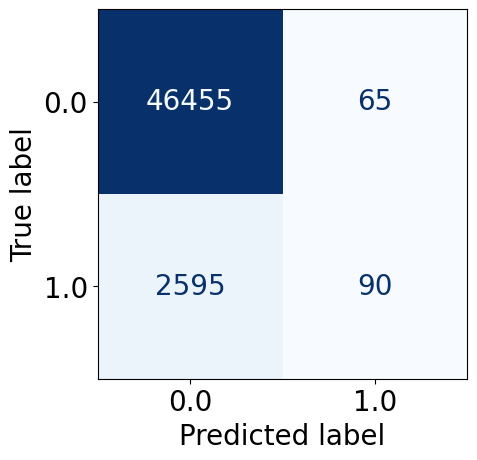

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for KNN
param_dist_knn = {'n_neighbors': randint(1, 50)}

# Create the KNN object
random_search_knn = RandomizedSearchCV(KNeighborsClassifier(), param_dist_knn, n_iter= 15, cv=3, scoring='balanced_accuracy', random_state=42)

# Fit the random search to the data
random_search_knn.fit(X_train_prepared_select, y_train)
y_pred = random_search_knn.best_estimator_.predict(X_test_prepared_select)

# Get the best parameters and the best score
knn_best = random_search_knn.best_estimator_
print("Best parameters for knn:", random_search_knn.best_params_)

print_scores(y_test, y_pred)


####2-Logistic Regression with Grid Search

Best parameters for Logistic Regression: {'C': 250}
Accuracy=0.9487, Balanced Accuracy=0.6170
Precision=0.5698, Recall=0.2447, F1-score=0.3424


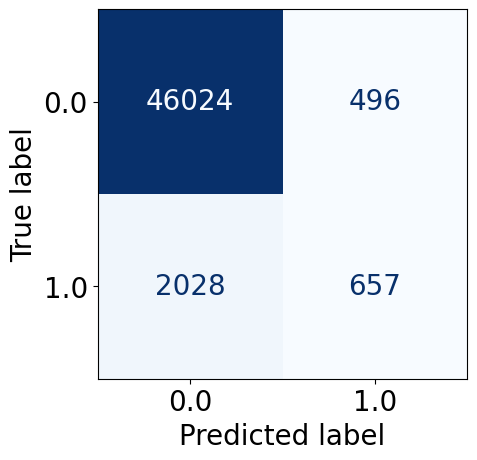

In [ ]:
# Define the parameter grid for Logistic Regression
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100, 250, 500]}

# Create the GridSearchCV object
grid_search_lr = GridSearchCV(LogisticRegression(max_iter = 1000), param_grid_lr, cv=5, scoring='balanced_accuracy')

# Fit the grid search to the data
grid_search_lr.fit(X_train_prepared_select, y_train)
y_pred = grid_search_lr.best_estimator_.predict(X_test_prepared_select)

# Get the best parameters and the best score
lr_best = grid_search_lr.best_estimator_
print("Best parameters for Logistic Regression:", grid_search_lr.best_params_)

print_scores(y_test, y_pred)

####3-Random Forest with Random Search

Best parameters for Random Forest: {'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 171}
Accuracy=0.9466, Balanced Accuracy=0.5192
Precision=0.6883, Recall=0.0395, F1-score=0.0747


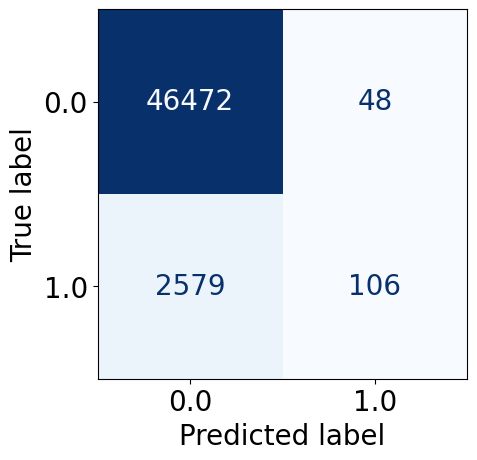

In [ ]:
# Define the parameter distribution for Random Forest
param_dist_rf = {'n_estimators': randint(100, 500),
    'max_features': ['sqrt', 'log2'],
    'max_depth': randint(3, 10)}

# Create the RandomizedSearchCV object
random_search_rf = RandomizedSearchCV(RandomForestClassifier(), param_dist_rf, n_iter= 15, cv=3, scoring='balanced_accuracy', random_state=42)

# Fit the random search to the data
random_search_rf.fit(X_train_prepared_select, y_train)
y_pred = random_search_rf.best_estimator_.predict(X_test_prepared_select)

# Get the best parameters and the best score
rf_best = random_search_rf.best_estimator_
print("Best parameters for Random Forest:", random_search_rf.best_params_)

print_scores(y_test, y_pred)

####5-Naive Bayes with random search

Best parameters for Naive Bayes: {'var_smoothing': 8.111308307896872e-05}
Accuracy=0.7906, Balanced Accuracy=0.7749
Precision=0.1740, Recall=0.7572, F1-score=0.2830


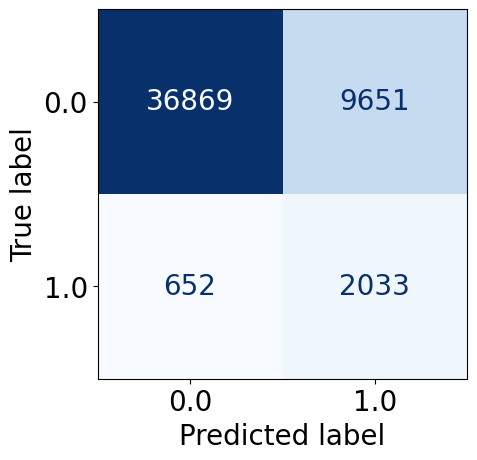

In [ ]:
# Define the parameter grid for Naive Bayes
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

# Create the Naive Bayes object
grid_search_NB = GridSearchCV(GaussianNB(), params_NB, cv=3, scoring='balanced_accuracy')

# Fit the random search to the data
grid_search_NB.fit(X_train_prepared_select, y_train)
y_pred = grid_search_NB.best_estimator_.predict(X_test_prepared_select.toarray())

# Get the best parameters and the best score
nb_best = grid_search_NB.best_estimator_
print("Best parameters for Naive Bayes:", grid_search_NB.best_params_)

print_scores(y_test, y_pred)

Key findings from the model comparison: Logistic Regression achieved the highest overall accuracy and balanced accuracy, establishing it as the most effective model in terms of overall correctness. Despite its lower accuracy, Naive Bayes excelled in recall, demonstrating its effectiveness in identifying positive cases,  with a high rate of false positives (low precision). In contrast, kNN and Random Forest have higher precision but significantly lower recall. However, in medical diagnostics, where identifying as many positive cases as possible is crucial (high recall), despite the risk of more false positives, Naive Bayes would be the most suitable choice for this particular dataset.

##**Cost Evaluation of each model**

We decided to add a cost of 10 to each FN and a cost of 1 to each FP. This is because the cost of Heart Disease going undiagnosed is signficantly higher than the cost of misdiagnosing it.

In [ ]:
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import cross_val_score

def default_cost(y_true, y_pred):
  cm = confusion_matrix(y_true, y_pred)
  return cm[1,0] * 10 + cm[0,1] * 1

cost_scorer = make_scorer(default_cost)

In [ ]:
lr_costs = cross_val_score(lr_best, X_test_prepared_select, y_test, cv=5, scoring=cost_scorer)
print(f'The average cost of Logistic Regression is {lr_costs.mean():.1f}.')

The average cost of Logistic Regression is 4112.8.


In [ ]:
rf_costs = cross_val_score(rf_best, X_test_prepared_select, y_test, cv=5, scoring=cost_scorer)
print(f'The average cost of Random Forest is {rf_costs.mean():.1f}.')

The average cost of Random Forest is 5153.8.


In [ ]:
knn_costs = cross_val_score(knn_best, X_test_prepared_select, y_test, cv=5, scoring=cost_scorer)
print(f'The average cost of KNN is {knn_costs.mean():.1f}.')

The average cost of KNN is 5260.4.


In [ ]:
nb_costs = cross_val_score(nb_best, X_test_prepared_select.toarray(), y_test, cv=5, scoring=cost_scorer)
print(f'The average cost of NB is {nb_costs.mean():.1f}.')

The average cost of NB is 3232.8.


In [ ]:
base_costs = cross_val_score(base_model, X_test_base, y_test, cv=5, scoring=cost_scorer)
print(f'The average cost of Base Model is {base_costs.mean():.1f}.')

The average cost of Base Model is 5370.0.


##**Conclusion**

In conclusion:  feature preprocessing, feature selection, and adequate model evaluation were the most important factors in our project. Our dataset required tons of cleaning and preprocessing before we were able to run the ML techniques that we learned in class. We then needed to winnow down the features so that the models could be run on them. Finally we needed to evaluate each model in a way that was representative of the unique challenge that diagnosing heart disease is. Our classes were heavily imbalanced, with most patients being labeled as not having heart disease, this in turn skewed the accuracy of our models. A basic classifier that returned negative would have an accuracy of over 90%. In contrast to that, each False Negative would be extremely costly in the real world, as missing a case of heart disease can lead to severe complications. We combated this by creating our own cost matrix that heavily penalized False Negatives compared to False Positives. Using this cost matrix, the best models were those that actually had the lowest pure accuracy, and overpredicted positive results. In the end our best model was Naive Bayes in terms of both balanced accuracy and our custom cost matrix.

##**Reference**


- [Kaggle Dataset](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease)
- [CDC](https://www.cdc.gov/heartdisease/risk_factors.htm)
- ChatGPT: Was used to condense the introduction, in the "insights" section of the feature selection and error analysis